# **Capstone Project: Data Driven suggestions for HR**

## Resumen

Este es el proyecto final para la certificación de Google Advanced Data Analytics brindado por Coursera, la siguiente data simula ser una empresa que busca tomar acciones para mejorar la satisfacción de los empleados. La data contiene distintas columnas con información recopilada a los empleados y se solicita realizar un análisis exploratorio y luego construir un modelo que pueda predecir si un empleado abandonará o no la empresa.

### HR Dataset

El dataset contiene 15000  filas y 10 coumnas divididas de la siguiente manera.

**Note:** Para mas información sobre el datast se puede descargar desde el siguiente link [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|nivel de satisfacción laboral [0&ndash;1]|
last_evaluation|Puntuación de la última evaluación de rendimiento del empleado [0&ndash;1]|
number_project|Número de proyectos a los que el empleado colabora.|
average_monthly_hours|Número promedio de horas que el empleado trabaja al mes.|
time_spend_company|Cuantos años el empleado está o estuvo en la compañia (años)
Work_accident|Si el empleado ha tenido o no un accidente en el trabajo.
left|Si el empleado ha dejado o no la compañia.
promotion_last_5years|Si el empleado ha sido promovido de puesto duante los últimos 5 años.
Department|Departamento al que pertenece el empleado.
salary|Salario del empleado (U.S. dollars)

## 1. Importando librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report

import warnings
warnings.filterwarnings('ignore')
print("las librerías hansido instaladas")

las librerías hansido instaladas


In [2]:
#Cargamos el dataset
df=pd.read_csv("HR_capstone_dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Limpieza y EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.shape

(14999, 10)

In [5]:
#Renombrando columnas
df.rename(columns={"Work_accident":"work_accident",
                   "average_montly_hours":"average_monthly_hours",
                   "time_spend_company":"tenure",
                   "Department":"department"}, inplace=True)

#### 2.1 Verificando valores nulos

In [6]:
#Verificando valores nulos
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

La data no presenta valores nulos en ninguna de sus variables.

#### Estadística descriptiva

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_monthly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
tenure,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


- El promedio del nivel de satisfacción de los empleados es de 0.61, un nivel moderado.
- Las evaluaciones a los empleados también estan por encima del promedio inferior, 0.71.
- Por otra parte vemos que el promedio de horas mensuales trabajadas es de 201 h/m. y el máximo es de 310. Debemos tomar en cuenta este dato.
- La permanencia de los empleados en la compañia en promedio es de 3.5 años cuando el máximo es de 10 años.
- La promoción de los últimos 5 años indica que aproximadamente el 2.1% de los empleados ha sido promovido de puesto durante este tiempo.

#### 2.2 Verificando valores duplicados

In [8]:
#Verificando valores duplicados
df.duplicated().sum()

3008

El dataset muestra 3008 filas duplicadas, eso es el 20% del df. Indagaremos más.

In [9]:
df[(df["department"]=="sales") & (df["salary"]=="medium") & (df["satisfaction_level"]==0.37)][df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
12178,0.37,0.51,2,127,3,0,1,0,sales,medium
12535,0.37,0.56,2,156,3,0,1,0,sales,medium
14389,0.37,0.51,2,127,3,0,1,0,sales,medium
14746,0.37,0.56,2,156,3,0,1,0,sales,medium


Ya que el dataset no cuenta con un Nro. único identificador, no podemos asumir de que cada fila es independiente y que no es un arror de duplicidad, por ende procederemos a eliminar las filas duplicadas.

In [10]:
#Elimincamos las filas duplicadas y la llevamos a un nuevo df
df2=df.drop_duplicates()
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### 2.3 Verificando Outliers

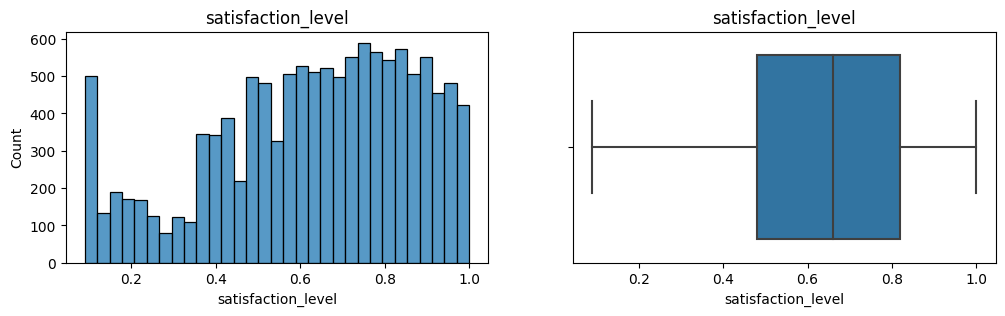

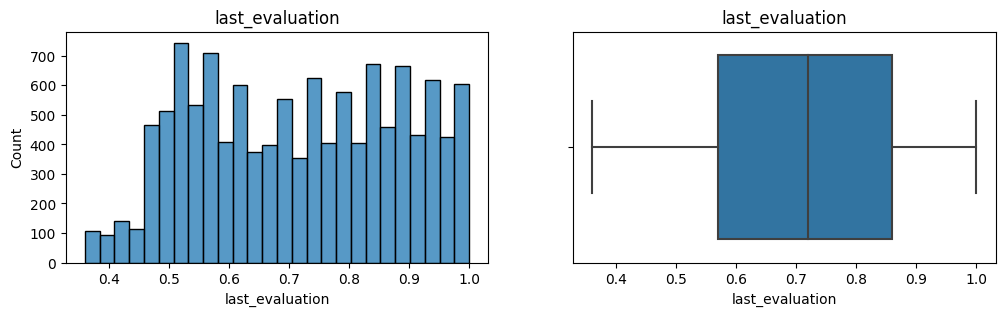

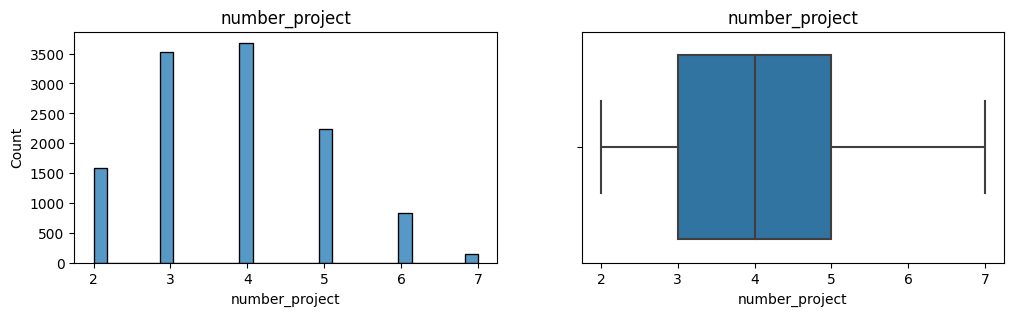

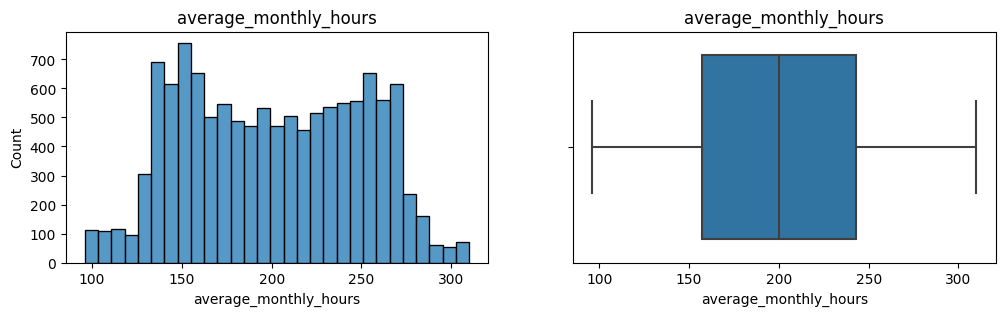

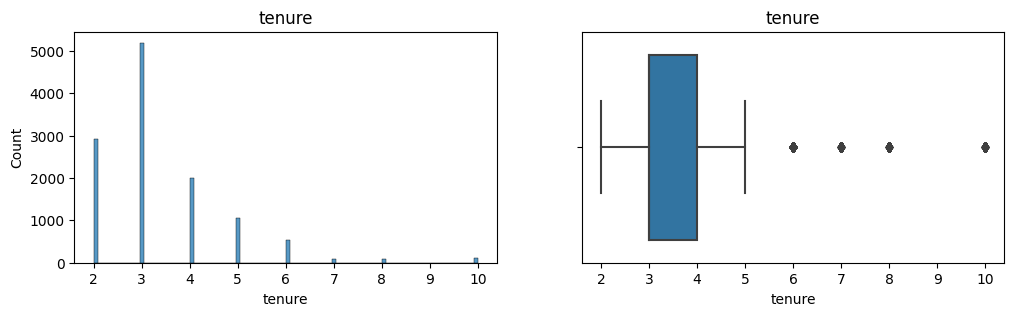

In [11]:
var_num = df.describe().columns.tolist() #separamos las variables numéricas
var_num = [x for x in var_num if x not in ["work_accident", "left", "promotion_last_5years"]]

for v in var_num:
    fig,ax=plt.subplots(1,2,figsize=(12,3))
    sns.histplot(data=df2, x=v, ax=ax[0])
    sns.boxplot(data=df2, x=v, ax=ax[1])
    ax[0].set_title(f"{v}")
    ax[1].set_title(f"{v}")
    plt.show()

- Se puede observar una distribución más acampanada en la variable `average_monthly_hours`.
- La variable `tenure` presenta outliers que solucionaremos de acuerdo al modelo a usar posteriormente.

In [12]:
Q1 = df2["tenure"].quantile(0.25)
Q3 = df2["tenure"].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [13]:
outliers=df2[(df2["tenure"]<lower_limit) | (df2["tenure"]>upper_limit)]
print(f"El número de outliers en la variable tenure es de {len(outliers)}.")

El número de outliers en la variable tenure es de 824.


## 3.Visualización de Datos

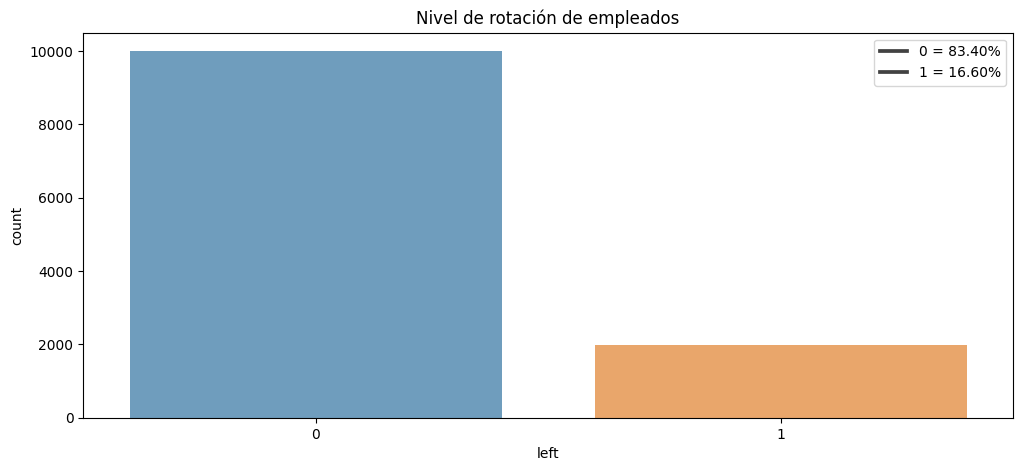

In [14]:
#Nro de personas que se fueron vs las personas que aún laboran en la compañia
data_left = df2["left"].value_counts().reset_index()
porcentaje = df2["left"].value_counts(normalize=True)*100
plt.figure(figsize=(12,5))
sns.barplot(data=data_left, x="left", y="count", alpha=0.7)
plt.title("Nivel de rotación de empleados")
legend_labels = [f"{label} = {porcentaje:.2f}%" for label, porcentaje in zip(data_left["left"], porcentaje)]
plt.legend(legend_labels)
plt.show()

- Como se observa 83% de los empleados siguen trabajando en la empresa y casi 17% renunciaron o han sido despedidos.

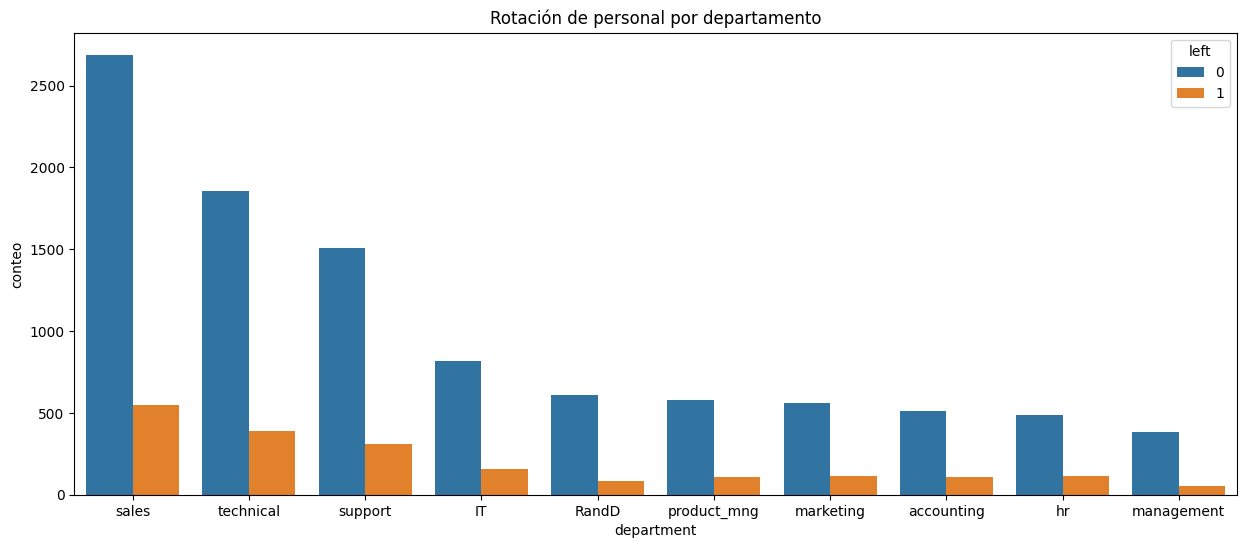

In [15]:
rota_dept=df2.groupby(["department", "left"])["number_project"].count().reset_index().rename(columns={"number_project":"conteo"})
rota_dept.sort_values(by="conteo", ascending=False, inplace=True)
plt.figure(figsize=(15,6))
sns.barplot(data=rota_dept, x="department", y="conteo", hue="left")
plt.title("Rotación de personal por departamento")
plt.show()

- Podemos apreciar que el departamento que más rotación ha tenido es el deartamento de ventas. 

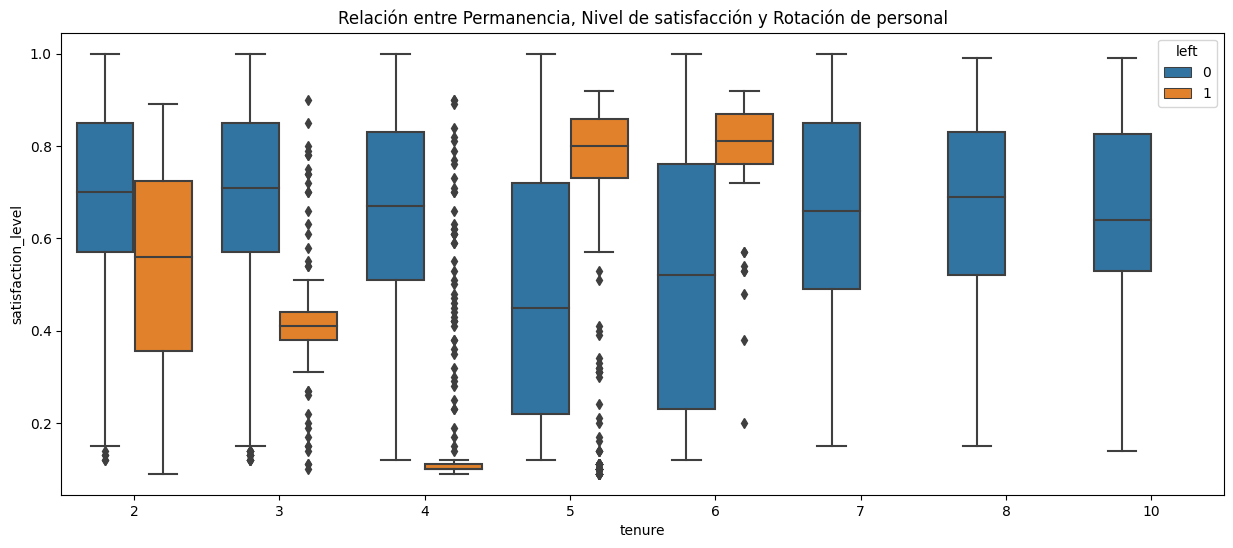

In [16]:
#Boxplot variable tenure por satisfacción laboral
plt.figure(figsize=(15,6))
sns.boxplot(data=df2, x="tenure", y="satisfaction_level", hue="left")
plt.title("Relación entre Permanencia, Nivel de satisfacción y Rotación de personal")
plt.show()

- Los empleados con 4 años de permanencia que abandonaron la empresa tienen curiosamente un nivel de satisfacción muy bajo en comparación con el resto, sería bueno revisar si cambio alguna política para esos empleados.
- Por otra parte el nivel de satisfacción de los empleados mas antiguos es muy similar al de los nuevos empleados.

Hemos visto anteriormente en el análisis de estadística decriptiva que la media es de 201 h/m trabajadas y el maximo 200. Asumiendo que el añoo tiene 52 semanas y le restamos 2 por vacaciones, lo multiplicamos por 40 horas semanales de trabajo y dividimos por los 12 meses (40*50/12) tenemos que en promedio una persona en el escenario perfecto debería trabajar 166 h/m.

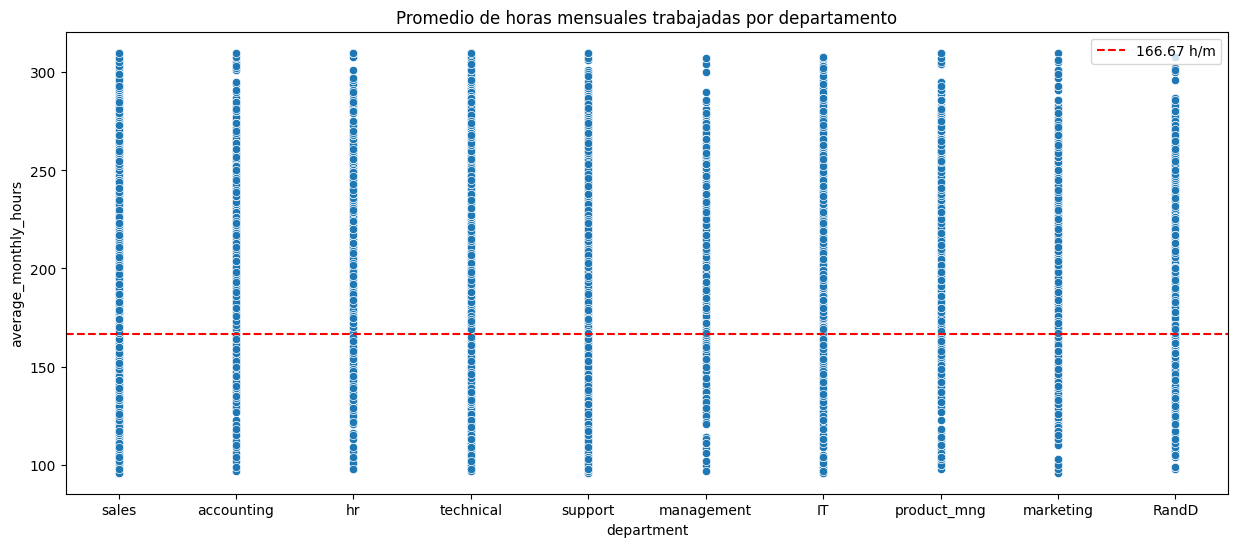

In [17]:
#Promedio de Horas menduales trabajadas por departamento
plt.figure(figsize=(15,6))
sns.scatterplot(data=df2, x="department", y="average_monthly_hours")
plt.axhline(166.67, color="red", ls="--", label="166.67 h/m")
plt.legend(loc="best")
plt.title("Promedio de horas mensuales trabajadas por departamento")
plt.show()

- Podemos observar que todos los departamentos superan muy por encima el promedio las horas trabajadas al mes.

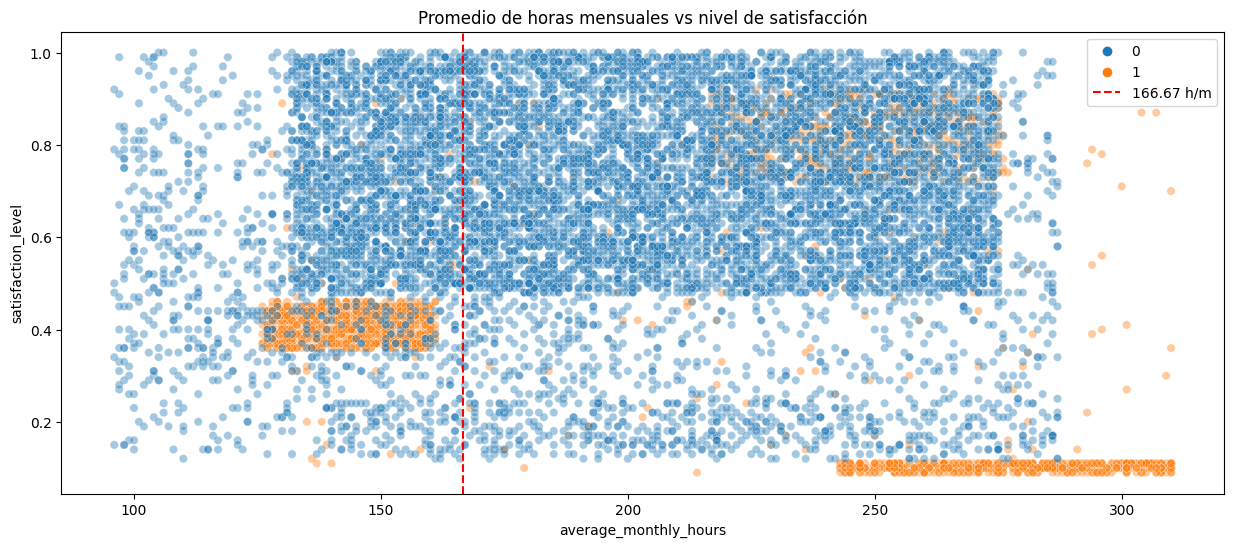

In [18]:
#Promedio de horas mensuales vs satisfacción laboral.
plt.figure(figsize=(15,6))
sns.scatterplot(data=df2, x="average_monthly_hours", y="satisfaction_level", hue="left", alpha=0.4)
plt.axvline(166.67, color="red", ls="--", label="166.67 h/m")
plt.title("Promedio de horas mensuales vs nivel de satisfacción")
plt.legend(loc="best")
plt.show()

- Y como era de esperarse el grupo de personas que trabajaban por encima de 230 h/m y renunciaron tenian un satisfacción laboral por debajo del 20%.

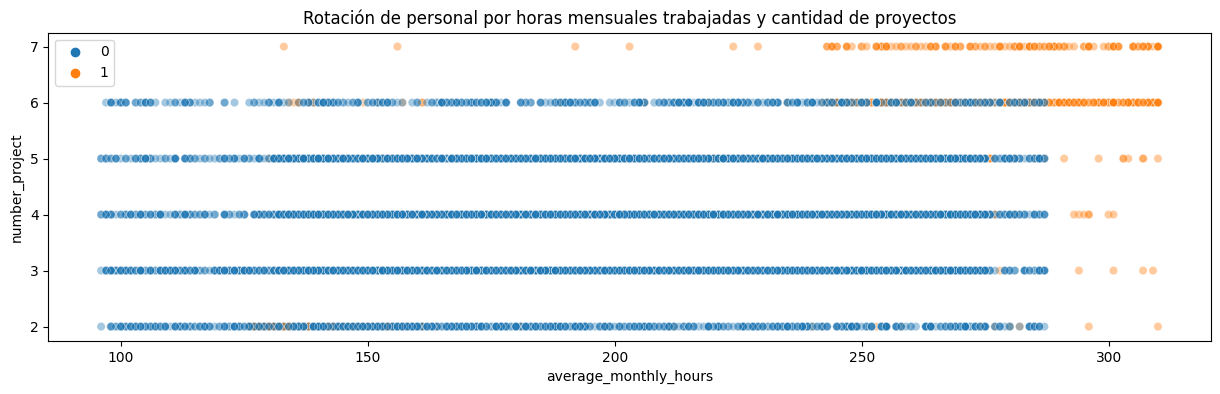

In [19]:
#Abandono laboral por promedio de horas mensuales trabajadas y nro de proyectos.
plt.figure(figsize=(15,4))
sns.scatterplot(data=df2, x="average_monthly_hours", y="number_project", hue="left", alpha=0.4)
plt.title("Rotación de personal por horas mensuales trabajadas y cantidad de proyectos")
plt.legend(loc="best")
plt.show()

- Todos los empleados con 7 proyectos y promedio mensual de horas de trabajo por encima de 230 h/m han renunciado a la empresa.
- Este patrón casi se repite con los empleados que trabajan en 6 proyectos, la concentración de renuncia esta en aquellos que trabajan en más de 280 h/m. 

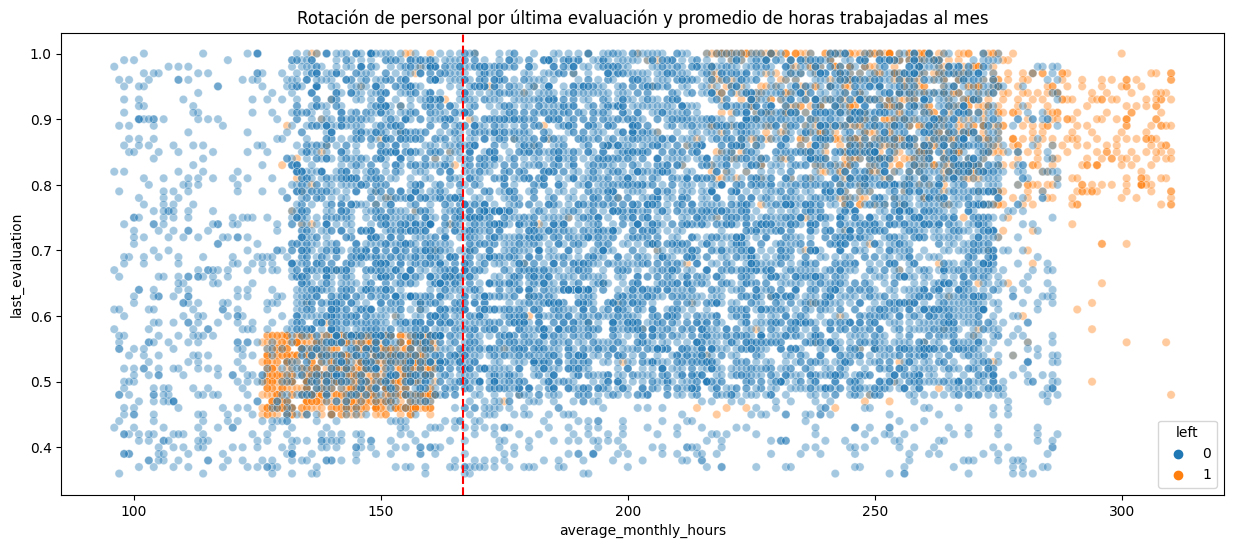

In [20]:
#Rotación de personal por ultima evaluación y promedio de horas trabajadas al mes.
plt.figure(figsize=(15,6))
sns.scatterplot(data=df2, x="average_monthly_hours", y="last_evaluation", hue="left", alpha=0.4)
plt.axvline(166.67, color="red", ls="--", label="166.67 h/m")
plt.title("Rotación de personal por última evaluación y promedio de horas trabajadas al mes")
plt.show()

- La rotación de personal se divide en 2 grupos, sobrecarga de trabajo y tenían una evaluación muy alta, y los que trabajaban por debajo del promedio mensual y tenían una evaluación baja.
- Se puede ver una correlación entre horas de trabajo y la evaluación al personal.
- Se puede observar que trabajar largas horas al mes tampoco asegura una alta evaluación.

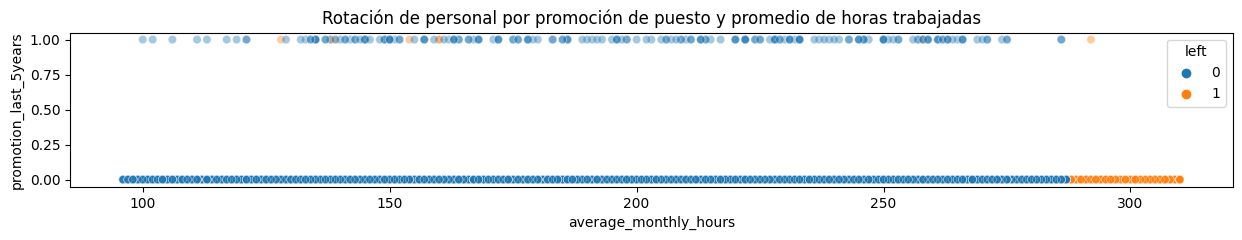

In [21]:
#Rotación de personal por promoción de puesto durante los últimos 5 años.
plt.figure(figsize=(15,2))
sns.scatterplot(data=df2, x="average_monthly_hours", y="promotion_last_5years", hue="left", alpha=0.4)
plt.title("Rotación de personal por promoción de puesto y promedio de horas trabajadas")
plt.show()

- En los últimos 5 años, muy pocos empleados han sido promovidos de puesto.
- Todas las personas que no han sido promovidas y han renunciado o han sido despedidas trabajaban en promedio mensual largas horas.

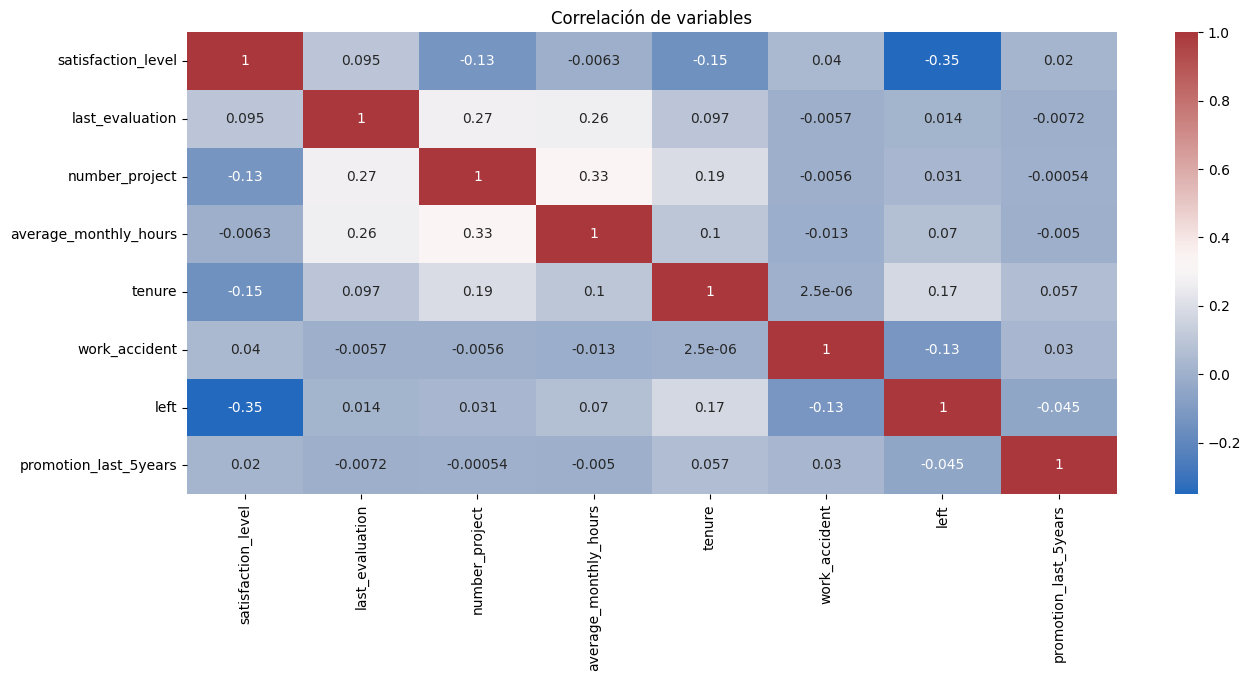

In [22]:
#Heatmap correlation
var_num=df2.describe().columns.tolist()
plt.figure(figsize=(15,6))
sns.heatmap(data=df2[var_num].corr(), annot=True, cmap="vlag")
plt.title("Correlación de variables")
plt.show()

- La correlación de variables confirma que `number_project`, `last_evaluation` y `average_monthly_hours`, todos tienen una correlación positiva moderada.
- Por otro lado `satisfaction_level` y `left`muestra una correlación negativa, quiere decir que mientras más baje el nivel de satisfacion aumentarán las renuncias.

### 3.2 Insights

- En resumen, se pudo observar que la mayoría de empleados que abandonan la empresa es por una mala gestión ligada a jornadas laborales largas y estar trabajando en varios proyectos a la vez. A esto sumar el hecho de tampoco recibir promociones en puestos de trabajo y sentirse sobrecargados.
- También pudimos observar que los empleados que llevan más de 6 años en la empresa, tienden a quedarse y no renunciar.

## 4. Feature Engineering

Como se pudo observar, uno de los principales motivos de renuncia está relacionado con la carga laboral y las largas horas de trabajo. Por lo tanto, considerando que el promedio mensual de horas laborales en un escenario ideal es de 166.67 horas mensuales, podemos establecer que trabajar más de 175 horas al mes se considera una sobrecarga de trabajo.

Para ello crearemos una columna binaria nueva llamada `overworked`.

In [23]:
#Copiamos el dataset en un df nuevo
df=df2.copy()

In [24]:
#Creando columna
df["overworked"]=df["average_monthly_hours"].apply(lambda x: 1 if x > 175 else 0)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,overworked
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,0


## 5. Codificando Variables

In [25]:
#Codificando variable Salary 0 = low, 1 = medium, 2=high

df["salary"]=df["salary"].apply(lambda x: 0 if x == "low" else (1 if x == "medium" else (2 if x == "high" else x)))

In [26]:
#Codificando variable department
df=pd.get_dummies(data=df, columns=["department"])

df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,overworked,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,1,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,0,False,False,False,False,False,False,False,True,False,False


## 6. Modelamiento

- El enfoque final del modelado es predecir si el empleado dejará la empresa o no, para eso contamos con una variable "left" que es binaria 1=si, 0=no.
- Debido a que la variable a predecir es categórica vamos a construiur un modelo de Regresión Logística y modelo de machine Learning basado en árboles de decisión.

### 6.1 LogisticRegression

In [27]:
#Copiamos el df
df_logreg = df.copy()

Ya que LogisticRegression es sensible a los outliers vamos a empezar eliminandos de la columna `tenure` que ya habiamos identificado contenia estos valores atípicos.

In [28]:
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,overworked,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,1,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,0,False,False,False,False,False,False,False,True,False,False


In [29]:
Q1 = df_logreg["tenure"].quantile(0.25)
Q3 = df_logreg["tenure"].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df_logreg["tenure"]=df_logreg["tenure"].apply(lambda x: lower_limit if x < lower_limit else x)
df_logreg["tenure"]=df_logreg["tenure"].apply(lambda x: upper_limit if x > upper_limit else x)

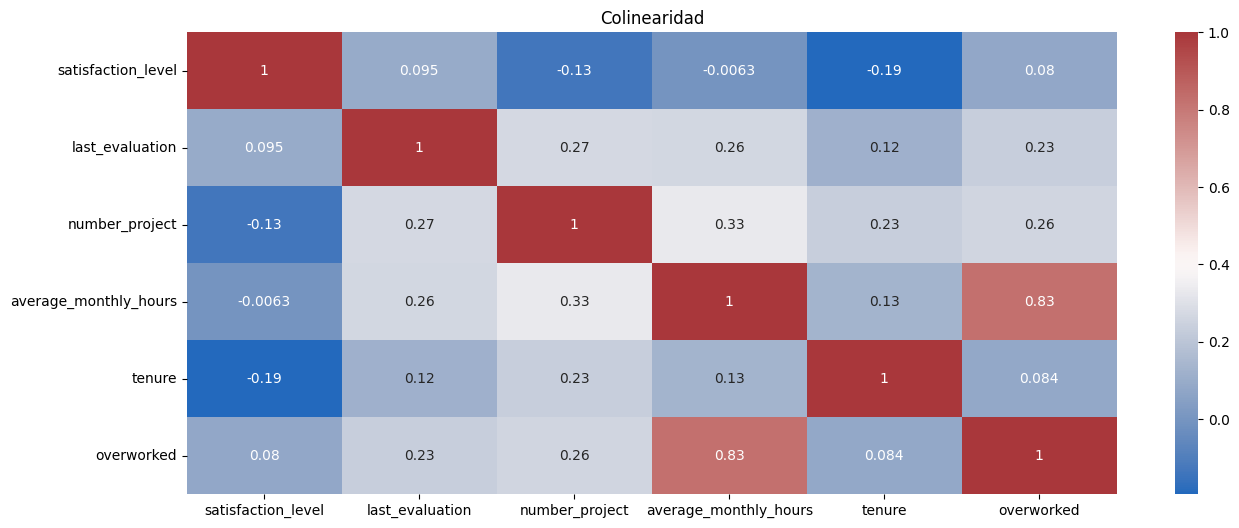

In [30]:
#Revisando colinearidad
plt.figure(figsize=(15,6))
sns.heatmap(df_logreg[["satisfaction_level",
            "last_evaluation",
            "number_project",
            "average_monthly_hours",
            "tenure", "overworked"]].corr(), annot=True, cmap="vlag")
plt.title("Colinearidad")
plt.show()

- Parte de los supuestos de la Regresión Logística es evitar la multicolinealidad entre dos variables independientes, en este caso procederemos a eliminar la variable `average_monthly_hours`.

In [31]:
#Balance de variable a predecir
df_logreg["left"].value_counts(normalize=True)

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

- La variable a predecir esta desbalanceada pero no a un nivel extremo donde tendríamos que usar upsampling, en este caso usaremos stratify al momento de hacer split.

In [32]:
#Separamos las variables en X e y

y = df_logreg["left"]

X = df_logreg.drop(columns=["left", "average_monthly_hours"])

In [33]:
#Realizamos el split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=0)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8993, 18), (2998, 18), (8993,), (2998,))

In [35]:
%%time
#Construimos y entrenamos el modelo

lr = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

CPU times: total: 31.2 ms
Wall time: 55.4 ms


In [36]:
#Predicciones X_test
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

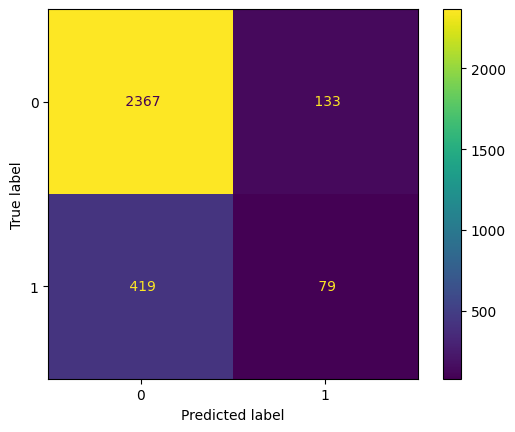

In [37]:
#Construyendo la Matriz de Confusión

cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
cm_plot.plot(values_format=" ")
plt.show()

- El cuadrante superior izquierdo muestra los **Verdaderos Negativos**, son los empleados que se quedaron y el modelo predijo correctamente.
- EL cuadrante superior derecho muestra los **Falsos Positivos**, son los empleados que no se fueron y el modelo predijo que si.
- EL cuadrante inferior izquierdo muestra los **Verdaderos Positivos**, son los empleados que si se fueron y el modelo predijo correctamente.
- El cuadrante inferior derecho muestra a los **Falsos Negativos**, son los empleados que se fueron y el modelo predijo que no.

In [41]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"El accuracy del modelo es de {accuracy:.3f}")
print(f"La precision del modelo es de {precision:.3f}")
print(f"El recall del modelo es de {recall:.3f}")
print(f"El f1_score del modelo es de {f1:.3f}")

El accuracy del modelo es de 0.816
La precision del modelo es de 0.373
El recall del modelo es de 0.159
El f1_score del modelo es de 0.223


- **Accuracy:** El modelo tiene una exactitud de 0.816, esto significa que el 81.6% de las predicciones hechas por el modelo son correctas en relación con todas las predicciones realizadas.
  
- **Precision:** La precisión del modelo es de 0.373, lo cual indica que de todas las predicciones positivas hechas por el modelo, solo el 37.3% son verdaderamente positivas, en otras palabras el modelo tiene a tener un alto número de falsos positivos.

- **Recall** (Tasa de verdaderos positivos): El recall del modelo es de 0.159, lo que significa que el modelo es capaz de identificar correctamente al 15.9% de los casos positivos (`left`=1) en la data. Este valor bajo sugiere que el modelo no es muye efectivo para detectas todos los casos positivos.

- **F1_Score:** El F1_score es una métrica que combina precision y recall en una sola medida, y en este caso se refleja relativamente bajo.

En resumen, por mas que el modelo tenga un accuracy decente en general, presenta problemas con la precisión y el recall, lo que sugiere que hay un desequilibrio en la capacidad del modelo para clasificar correctamente los casos positivos y negativos. El bajo recall indica que el modelo tiene dificultades para identificar todos los casos positivos, mientras que la baja precisión indica que hay un número significativo de falsos positivos. El valor del F1 Score también sugiere que se necesita un ajuste para mejorar el equilibrio entre la precisión y el recall.

### 6.2 DecissionTree

Para los siguientes modelos usaremos la validación cruzada con GridSearchCV.

In [47]:
#DecissionTree es robusto de acuerdo a los outliers por ende volveremos a hacer split con la data original codificada

df_dt=df.copy()

y=df_dt["left"]

X=df_dt.drop(columns=["left"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=0)

In [54]:
#Iniciamos el modelo
dt = DecisionTreeClassifier(random_state=0)

#Definimos los hyperparametros
cv_params = {"max_depth":[2,4,6,8,10,20,30,40,None],
            "min_samples_leaf":[2,5,10,20,50],
            "min_samples_split":[2,4,6,8,10]}

scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

dt_cv = GridSearchCV(dt, cv_params, scoring=scoring, cv=5, refit="roc_auc")

In [55]:
%%time

#Entrenamos elmodelo
dt_cv.fit(X_train, y_train)

CPU times: total: 16.8 s
Wall time: 26 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 20, 30, 40, None],
                         'min_samples_leaf': [2, 5, 10, 20, 50],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [57]:
#Los mejores parámetros
dt_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 2}

In [58]:
#el mejor AUC
dt_cv.best_score_

0.9734061023695691

Es un AUC fuerte, lo cual indica que este modelo puede predecir muy bien a los empleados que se irán

In [59]:
#Construyendo una función para recoger los mejores valores y poderlos comparar despues

def best_result(nombre_modelo, modelo_object):
               
    best=pd.DataFrame(modelo_object.cv_results_) # llevamos todos los resultados a df
    
    best=best.iloc[best["mean_test_roc_auc"].idxmax(), :] #Extraemos solo el maximo valor
    
    #Extraemos auc, accuracy, precision, recall y f1 y lo llevamos a un dataframe
    auc = best["mean_test_roc_auc"]
    recall=best["mean_test_recall"]
    accuracy = best["mean_test_accuracy"]
    precision = best["mean_test_precision"]
    f1 = best["mean_test_f1"]
    table=pd.DataFrame({"Modelo":[nombre_modelo],
                        "Precision":[precision],
                        "Recall":[recall],
                        "f1":[f1],
                        "Accuracy":[accuracy],
                       "AUC":[auc]}
                        )
    return table    

In [71]:
results_dt = best_result("Decision Tree CV", dt_cv)
results_dt

,Modelo,Precision,Recall,f1,Accuracy,AUC
0,Decision Tree CV,0.941319,0.906902,0.923612,0.975092,0.973406


Los scores que presenta este modelo son muy fuertes y con muy buen performance, pero tengamos en cuenta que DecisionTree es sensible al overfitting por eso procederemos a volver a modelar usando RandomForest que es robusto ante el overfitting.

### 6.3 Random Forest

In [62]:
#Iniciamos el modelo

rf = RandomForestClassifier(random_state=0)

#Definimos los hyperparametros
cv_params={"max_depth":[2,3,4,5,None],
          "min_samples_leaf":[1,2,3],
          "min_samples_split":[2,3,4],
          "max_features":[1.0],
          "n_estimators":[75, 150,300,500]}

scoring=["accuracy", "f1", "precision", "recall", "roc_auc"]

rf_cv=GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit="roc_auc")

In [64]:
%%time
#Entrenamos el modelo
rf_cv.fit(X_train, y_train)

CPU times: total: 17min 59s
Wall time: 26min 18s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, None], 'max_features': [1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 150, 300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'])

In [67]:
#Los mejores parámetros
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [68]:
#el mejor AUC
rf_cv.best_score_

0.9793447075636162

In [75]:
results_rf=best_result("Random Forest CV", rf_cv)
results=pd.concat([results_rf, results_dt])

In [77]:
results

,Modelo,Precision,Recall,f1,Accuracy,AUC
0,Random Forest CV,0.946541,0.912925,0.929414,0.976982,0.979345
0,Decision Tree CV,0.941319,0.906902,0.923612,0.975092,0.973406


El score de RandomForest son mejores que las de DecisionTree por lo tanto vamos a utilizar este modelo.

### 6.4 Modelo Ganador

In [79]:
y_pred=rf_cv.best_estimator_.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

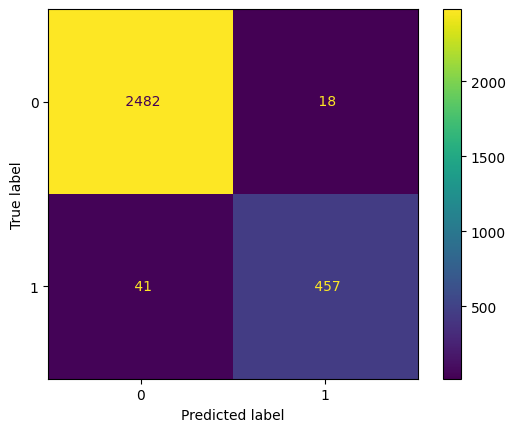

In [80]:
#Construyendo la Matriz de Confusión

cm = confusion_matrix(y_test, y_pred, labels=rf_cv.classes_)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.classes_)
cm_plot.plot(values_format=" ")
plt.show()

In [81]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"El accuracy del modelo es de {accuracy:.3f}")
print(f"La precision del modelo es de {precision:.3f}")
print(f"El recall del modelo es de {recall:.3f}")
print(f"El f1_score del modelo es de {f1:.3f}")

El accuracy del modelo es de 0.980
La precision del modelo es de 0.962
El recall del modelo es de 0.918
El f1_score del modelo es de 0.939


- **Accuracy**: El modelo tiene una precisión de 0.98. Esto significa que el 98.0% de las predicciones realizadas por el modelo son correctas en relación con todas las predicciones hechas.
  
- **Precision**: La precisión del modelo es de 0.962. Esto indica que, de todas las predicciones positivas hechas por el modelo, el 96.2% son verdaderamente positivas. En otras palabras, el modelo tiende a realizar pocas predicciones falsas positivas.

- **Recall:** El recall del modelo es del 0.91. Esto significa que el modelo es capaz de identificar correctamente el 91.8% de los casos positivos reales en el conjunto de datos.

- **F1 Score:** El valor del F1 Score es de 0.939. El F1 Score es una métrica que combina la precisión y el recall en una sola medida. En este caso, el valor del F1 Score refleja un equilibrio muy bueno entre la precisión y el recall.

El modelo es altamente efectivo para realizar predicciones precisas y para identificar la mayoría de los empleados a renunciar o los posibles empleados que serán despedidos. El valor del F1 Score también indica que el equilibrio entre la precisión y el recall es muy bueno, lo que sugiere que el modelo es adecuado para esta tarea de clasificación.

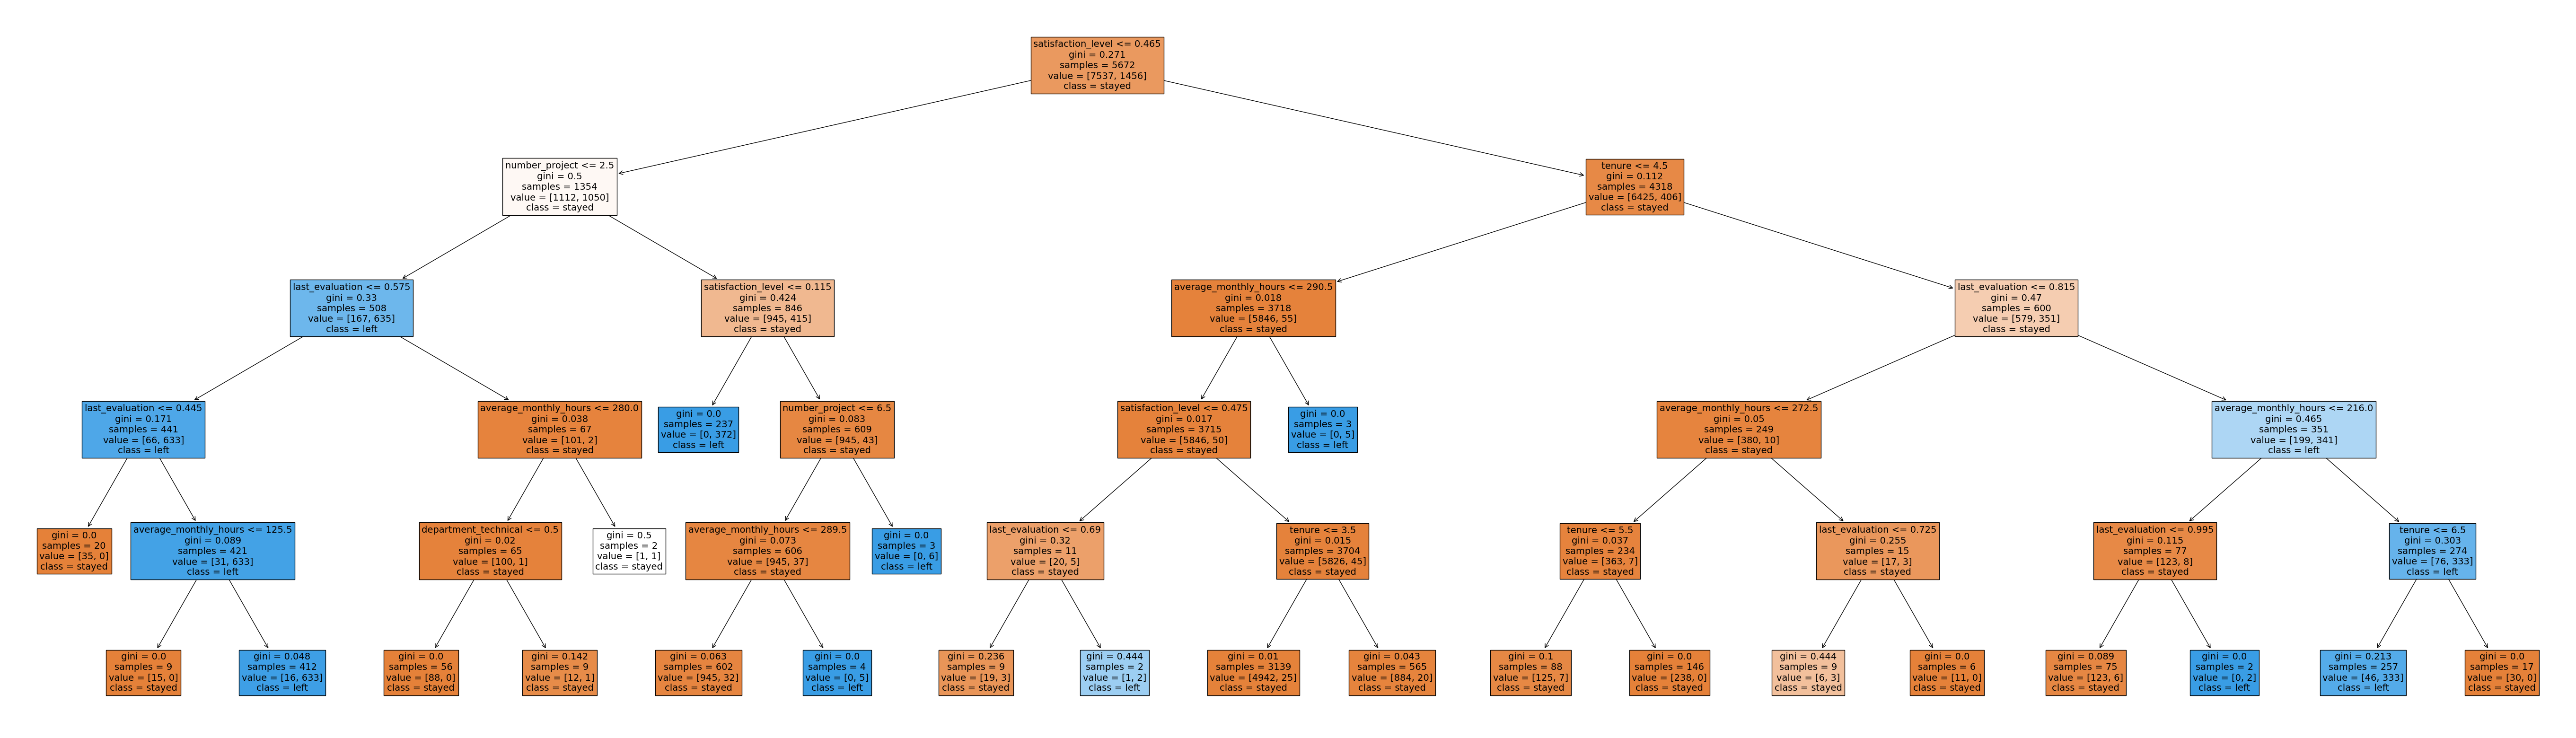

In [101]:
rf_plot=rf_cv.best_estimator_[0]
plt.figure(figsize=(70,20))
plot_tree(rf_plot, filled=True, fontsize=14, feature_names=X.columns, class_names={0:"stayed", 1:"left"})
plt.show()

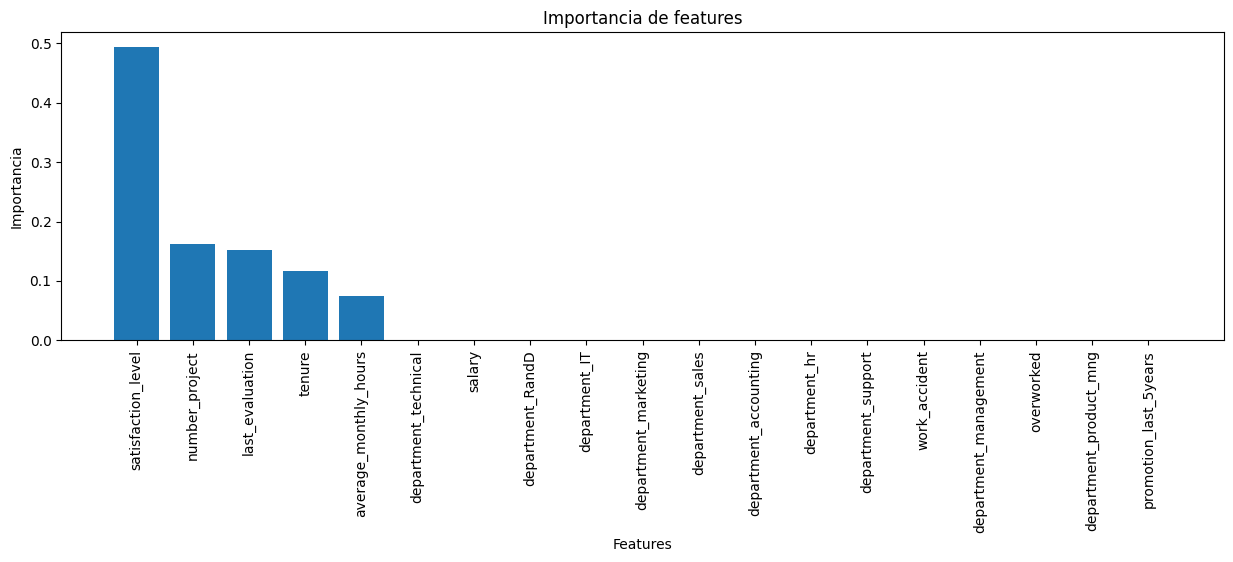

In [117]:
importances = rf_cv.best_estimator_.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]
plt.figure(figsize=(15,4))
plt.title("Importancia de features")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[x] for x in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importancia")
plt.show()

- El gráfico de barras nos muestra que para el modelo de Random Forest, `satisfaction_level`, `number_project`, `last_evaluation`, `tenure` y `average_monthly_hours` son los features mas importantes.

- Estas variables son los que mas le ayudan al modelo a predecir la variable `left`. 

## 7. Conclusiones y Recomendaciones

- Los modelos y la importancia de las variables confirman que los empleados de la empresa están sobrecargados de trabajo.

- Se recomienda limitar el nro de proyectos en los que el empleado se podría involucrar.
- Considerar también la posibilidad de promoción de puesto laboral a los empleados que llevan en la empresa al menos ya 4 años.
- Considerar bonos o algún tipo de incentivo a los empleados por trabajar más horas que el promedio.
- Por otro lado si la empresa en su política no considera pago de horas extras, informar a los empleados y aclararlo.
- Las altas evaluaciones al personal no debería estar reservado para los empleados que trabajan largas jornadas laborales.


**Tomando en cuenta que las evaluaciones no se realizan mas que 1 o 2 veces al año, esta variable podría estar representando una fuga de datos y en consecuencia podría ser incongruente con el modelo. Sin embargo a modo de ejemplo se ha considerado su inclusión en el modelo considero utilizarlo**